In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv('data/totalData.csv')

C:\Users\annab\AppData\Local\Temp\ipykernel_17424\3315903850.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/totalData.csv')


In [8]:
df_redfin = pd.read_csv("data/data_median_redfin.csv", dtype={"PostalCode": str}, low_memory=False)

In [9]:
price_cols = ["June", "July", "August", "September", "October", "November", "December", "January"]
df_redfin = df_redfin[["PostalCode"] + price_cols]

df_redfin["PostalCode"] = df_redfin["PostalCode"].astype("category")
df_redfin["MedianSalePrice"] = df_redfin[price_cols].mean(axis=1)

df_redfin = df_redfin[["PostalCode", "MedianSalePrice"]]

df_redfin = df_redfin.drop_duplicates(subset="PostalCode")
df["PostalCode"] = df["PostalCode"].astype("category")
df = df.merge(df_redfin, on="PostalCode", how="left", sort=True)
df["MedianSalePrice"] = df["MedianSalePrice"].fillna(df["MedianSalePrice"].median())

In [10]:
df

,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,MedianSalePrice
0,33836,OrangeCounty,OrangeCounty,Laminate,False,NaN,NaN,False,1076453744,davidmacleod@aol.com,...,5289.0,3.0,False,2.0,Duarte Unified,01010,0.0,5289.0,NaN,2.857007e+05
1,18135,SierraNorthValley,SierraNorthValley,NaN,True,NaN,NaN,True,1076021376,dustin@HomesByUpside.com,...,44867.0,3.0,False,2.0,Chico Unified,05073,0.0,44867.0,NaN,2.857007e+05
2,20280,Malibu,Malibu,Wood,True,NaN,NaN,False,1075660480,magnus@magnushellberg.com,...,3464.0,NaN,False,NaN,NaN,11217,NaN,3464.0,NaN,2.857007e+05
3,85851,Southland,Southland,"Carpet,Laminate,Tile,Vinyl",True,NaN,NaN,False,1095741747,mactar@earthlink.net,...,6407.0,1.0,False,2.0,William S. Hart Union,19351,0.0,6407.0,NaN,2.857007e+05
4,44226,BayEast,BayEast,Wood,NaN,NaN,True,False,1077710035,zofia.morse@yahoo.com,...,7501.0,NaN,False,0.0,NaN,63119-2447,NaN,7501.0,NaN,2.857007e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,5777,MLSListings,MLSListings,"Carpet,Laminate,Stone,Wood",True,NaN,NaN,False,1073238540,kimberliem@yahoo.com,...,14810.0,NaN,False,2.0,NaN,96161,2904.0,14810.0,NaN,1.290710e+06
91068,19704,MLSListings,MLSListings,"Carpet,Tile,Wood",True,NaN,NaN,NaN,1075767071,lynn@lynnshaffer.com,...,27878.0,NaN,False,2.0,NaN,96161,219.0,27878.0,NaN,1.290710e+06
91069,47913,Newport,Newport,NaN,True,NaN,NaN,False,1075672863,newportliferealty@gmail.com,...,2178.0,1.0,False,2.0,ABC Unified,96161,600.0,2178.0,NaN,1.290710e+06
91070,56631,BayEast,BayEast,"Laminate,SeeRemarks,Vinyl",NaN,NaN,True,False,1079695403,vincenttore@gmail.com,...,19166.0,NaN,False,1.0,NaN,96161,2907.0,19166.0,NaN,1.290710e+06


In [11]:
selected_cols = ["LivingArea", "BathroomsTotalInteger", "YearBuilt", "LotSizeSquareFeet", "DaysOnMarket", "MLSAreaMajor", "HighSchoolDistrict", "GarageSpaces", "Stories", "SubdivisionName"]

df_clean = df[selected_cols].copy()

df_clean["ClosePrice"] = df["ClosePrice"]
df_clean["ClosePrice"] = df_clean["ClosePrice"].fillna(df["MedianSalePrice"])


df_clean["Age"] = 2025 - df_clean["YearBuilt"]

df_clean["LotSizeSquareFeet"] = df_clean["LotSizeSquareFeet"].apply(lambda x: np.nan if x <= 0 else x)
df_clean["DaysOnMarket"] = df_clean["DaysOnMarket"].apply(lambda x: np.nan if x <= 0 else x)

# numeric cols
num_cols = ["ClosePrice", "LivingArea", "BathroomsTotalInteger", "YearBuilt", 
            "LotSizeSquareFeet", "DaysOnMarket", "Age", "GarageSpaces", "Stories"]
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

cat_cols = ["MLSAreaMajor", "HighSchoolDistrict", "SubdivisionName"]
for col in cat_cols:
    df_clean[col] = df_clean[col].astype("category").cat.codes

In [13]:
X = df_clean.drop(columns=["ClosePrice"])
Y = df_clean["ClosePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_estimators=700, learning_rate=0.03, max_depth=8, 
    subsample=0.85, colsample_bytree=0.85, 
    reg_lambda=3,  # Lowered from 10
    reg_alpha=1,  # Lowered from 5
    random_state=42
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
df_clean

,LivingArea,BathroomsTotalInteger,YearBuilt,LotSizeSquareFeet,DaysOnMarket,MLSAreaMajor,HighSchoolDistrict,GarageSpaces,Stories,SubdivisionName,ClosePrice,Age
0,1074.0,2.0,1956.0,5289.0,29.0,224,100,2.0,1.0,-1,789000.0,69.0
1,2038.0,2.0,1988.0,44867.0,18.0,-1,65,2.0,2.0,-1,580000.0,37.0
2,1788.0,4.0,1975.0,3464.0,20.0,-1,-1,2.0,1.0,-1,4600000.0,50.0
3,1889.0,3.0,1966.0,6407.0,28.0,482,396,2.0,2.0,4081,825000.0,59.0
4,843.0,1.0,1949.0,7501.0,69.0,-1,-1,0.0,1.0,4268,149000.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91067,1218.0,2.0,1979.0,14810.0,6.0,286,-1,2.0,1.0,-1,800000.0,46.0
91068,2855.0,5.0,1974.0,27878.0,32.0,286,-1,2.0,1.0,-1,1285000.0,51.0
91069,2269.0,4.0,2020.0,2178.0,102.0,900,0,2.0,2.0,-1,1500000.0,5.0
91070,1972.0,3.0,1977.0,19166.0,44.0,-1,-1,1.0,2.0,5800,567500.0,48.0


XGBoost Mean Squared Error: 1919456768074.7375
XGBoost R^2 Score: -0.2329


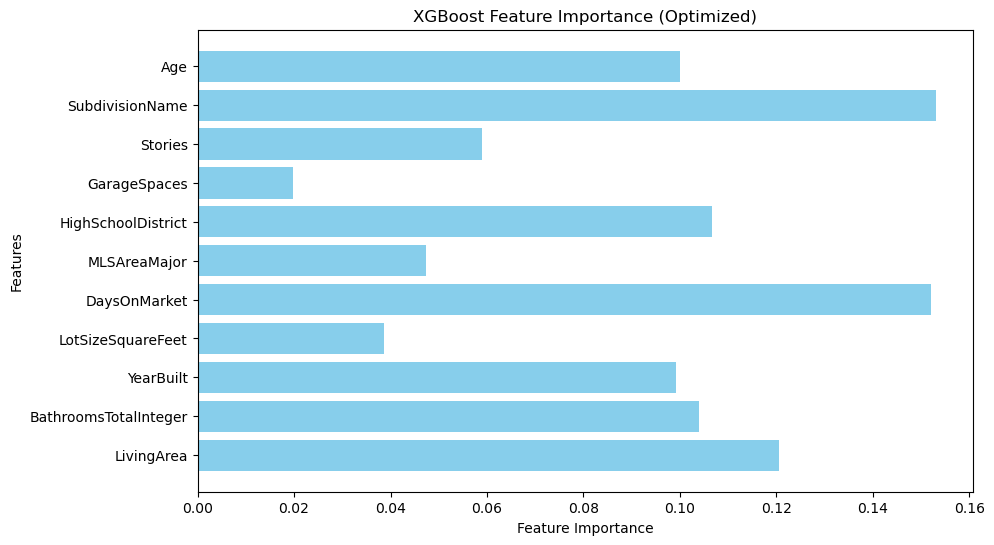

In [15]:
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.4f}")
print(f"XGBoost R^2 Score: {r2_xgb:.4f}")

importances = xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Optimized)")
plt.show()

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

# Using more features
selected_cols = [
    "LivingArea", "YearBuilt", "BathroomsTotalInteger", "LotSizeSquareFeet", 
    "DaysOnMarket", "MLSAreaMajor", "HighSchoolDistrict", "GarageSpaces", 
    "Stories", "SubdivisionName", "PoolPrivateYN", "ViewYN", 
    "AttachedGarageYN", "FireplacesTotal", "AssociationFee", "TaxAnnualAmount"
]

df_clean2 = df[selected_cols].copy()
df_clean2["ClosePrice"] = df["ClosePrice"]
df_clean2["ClosePrice"] = df_clean2["ClosePrice"].fillna(df["MedianSalePrice"])
df_clean2["ClosePrice"] = df_clean2["ClosePrice"].fillna(df_clean2["ClosePrice"].median())

df_clean2["Age"] = 2025 - df_clean2["YearBuilt"]

for col in ["LotSizeSquareFeet", "DaysOnMarket", "TaxAnnualAmount"]:
    df_clean2[col] = df_clean2[col].apply(lambda x: np.nan if x <= 0 else x)

num_cols = ["ClosePrice", "LivingArea", "YearBuilt", "BathroomsTotalInteger",
            "LotSizeSquareFeet", "DaysOnMarket", "Age", "GarageSpaces", "Stories",
            "FireplacesTotal", "AssociationFee", "TaxAnnualAmount"]

df_clean2[num_cols] = df_clean2[num_cols].fillna(df_clean2[num_cols].median())

cat_cols = ["MLSAreaMajor", "HighSchoolDistrict", "SubdivisionName"]
for col in cat_cols:
    df_clean2[col] = df_clean2[col].astype("category").cat.codes

binary_cols = ["PoolPrivateYN", "ViewYN", "AttachedGarageYN"]
df_clean2[binary_cols] = df_clean2[binary_cols].fillna("N")
df_clean2[binary_cols] = df_clean2[binary_cols].replace({"Y": 1, "N": 0}).astype(int)

df_clean2 = df_clean2[selected_cols + ["ClosePrice"]]

X2 = df_clean2.drop(columns=["ClosePrice"])
y2 = df_clean2["ClosePrice"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

assert list(X2_train.columns) == list(X2_test.columns), "Mismatch in training and testing features!"

xgb2 = XGBRegressor(
    n_estimators=500, learning_rate=0.03, max_depth=8, 
    subsample=0.85, colsample_bytree=0.85, 
    reg_lambda=3,  # Lowered from 10
    reg_alpha=1,  # Lowered from 5
    random_state=42
)

xgb2.fit(X2_train, y2_train)

y2_pred_xgb = xgb2.predict(X2_test)

mse_xgb2 = mean_squared_error(y2_test, y2_pred_xgb)
r2_xgb2 = r2_score(y2_test, y2_pred_xgb)

print(f"XGBoost Mean Squared Error (More Features): {mse_xgb2:.4f}")
print(f"XGBoost R^2 Score (More Features): {r2_xgb2:.4f}")

y2_pred_cv_log = cross_val_predict(xgb2, X2_train, y2_train, cv=5, n_jobs=1)

y2_pred_cv = np.expm1(y2_pred_cv_log)  # Convert predictions back to real price
y2_train_exp = np.expm1(y2_train)  # Convert actual values back

mae_cv = mean_absolute_error(y2_train_exp, y2_pred_cv)

# I have spent several hours debugging this. Either I have created the greatest model known to mankind or I am doing something wrong
print(f"Cross-validated MAE: ${mae_cv:,.2f}")

XGBoost Mean Squared Error (More Features): 907641012928.9838
XGBoost R^2 Score (More Features): 0.4170


C:\Users\annab\AppData\Local\Temp\ipykernel_17424\1954594066.py:65: RuntimeWarning: overflow encountered in expm1
  y2_pred_cv = np.expm1(y2_pred_cv_log)  # Convert predictions back to real price
c:\Users\annab\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

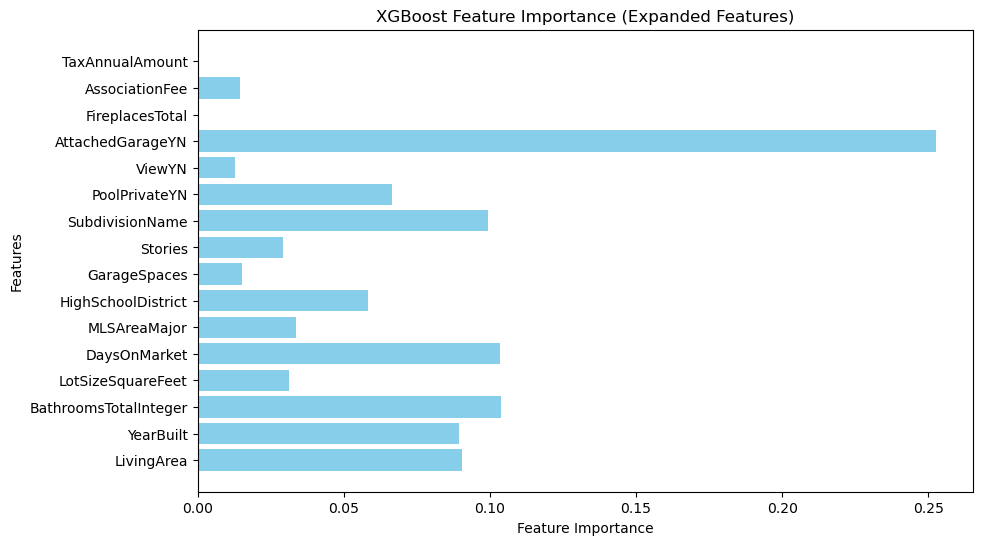

In [19]:
importances = xgb2.feature_importances_
feature_names = X2.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Expanded Features)")
plt.show()